# Diabetes Predictions By Using Machine Learning

IMPORT LIBRARIES AS WELL AS DATASET

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import os
%matplotlib inline
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Downloads/diabetes_prediction_.csv")

In [3]:
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


We make two copy of the original dataset

In [4]:
df1 = df.copy(deep=True)
df2 = df.copy(deep=True)

# DATA PREPROCESSING

In [5]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [7]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [8]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

# EXPLORATORY DATA ANALYSIS

Here, in this dataset have Categorical features for that we seperate categorical and numerical features. So, now create EDA for numerical data.First, check the Outliers

In [9]:
cat = df.select_dtypes(include="object")
num = df.select_dtypes(include="number")

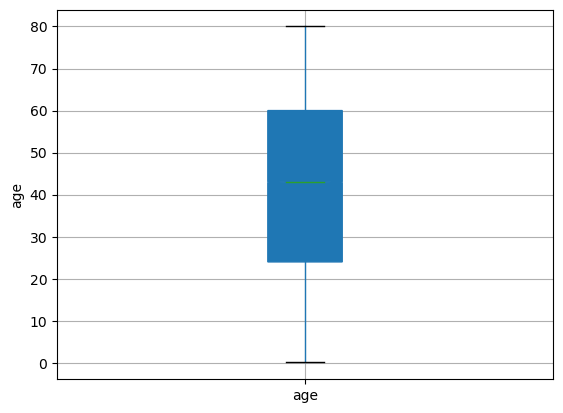

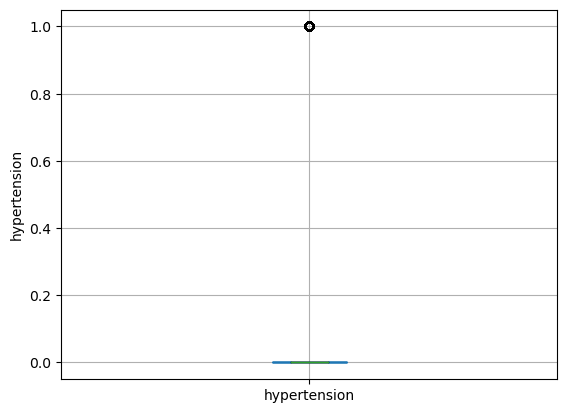

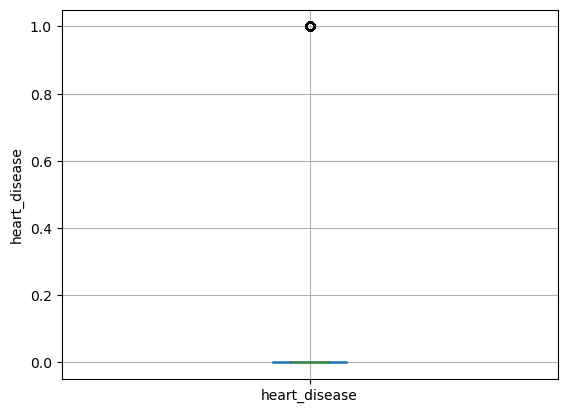

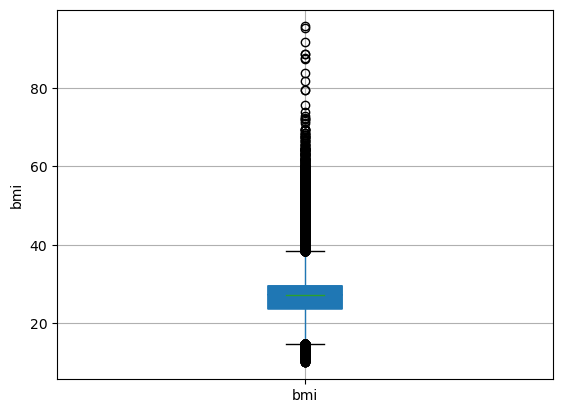

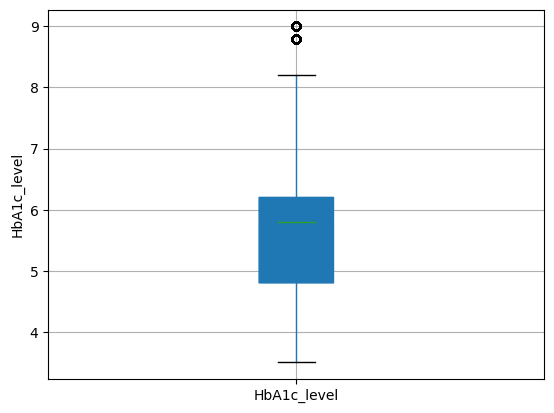

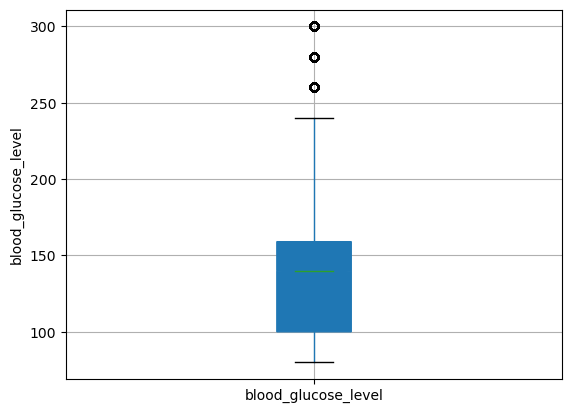

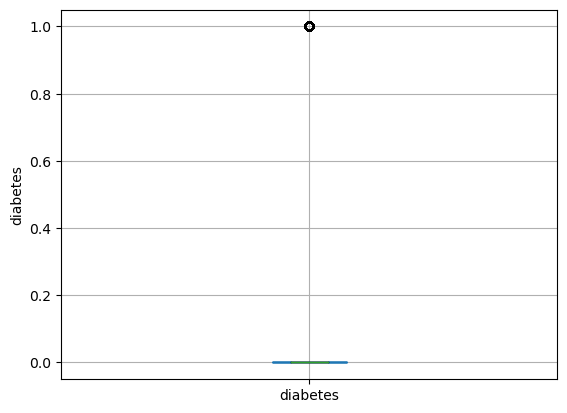

In [10]:
for i in num:
    num.boxplot(column=i, patch_artist = True, notch ='True')
    plt.ylabel(i)
    plt.show()

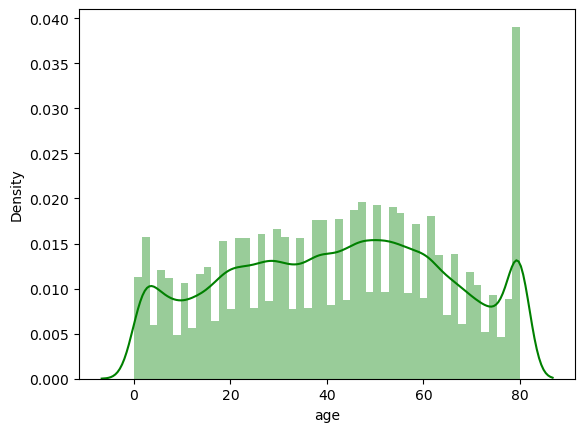

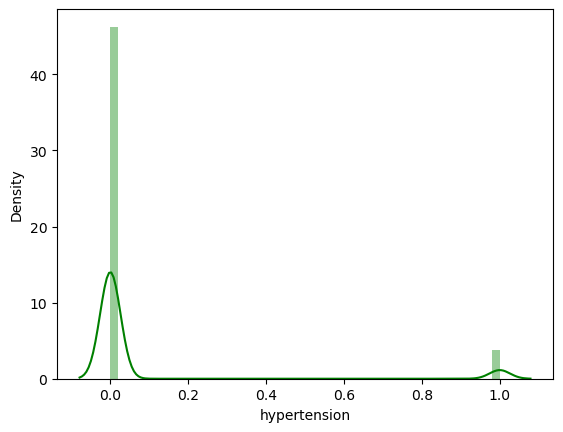

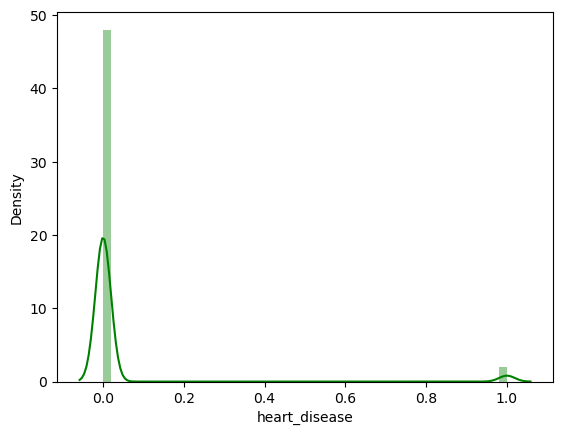

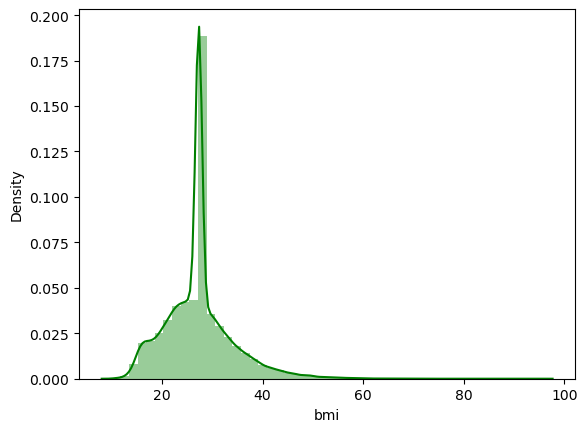

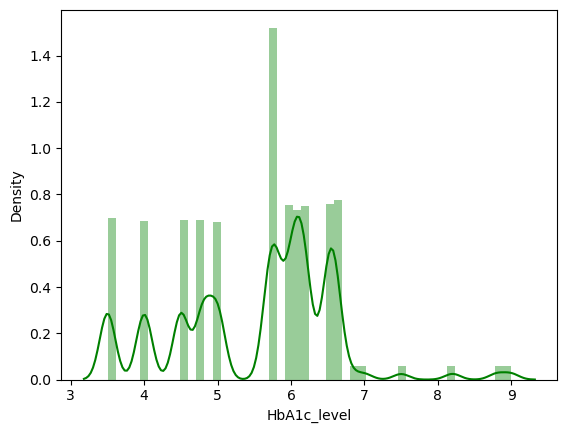

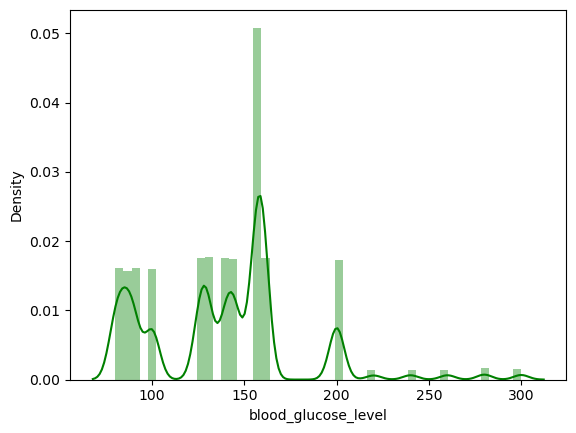

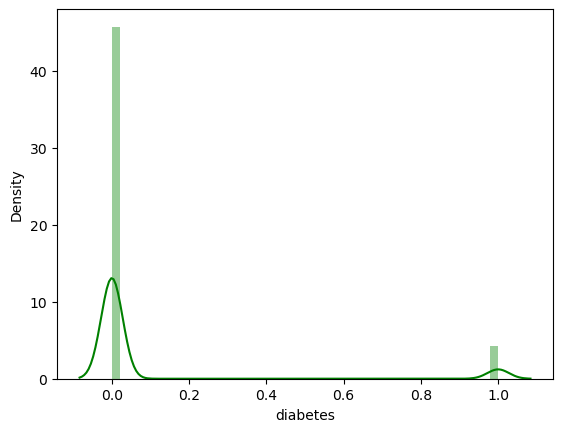

In [11]:
for i in num:
    sns.distplot(df[i], kde = True, color = 'green')
    plt.show()

Now, we Check the categorical distrubition.

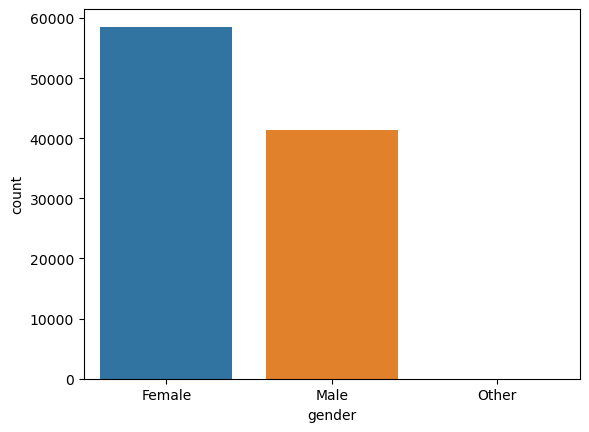

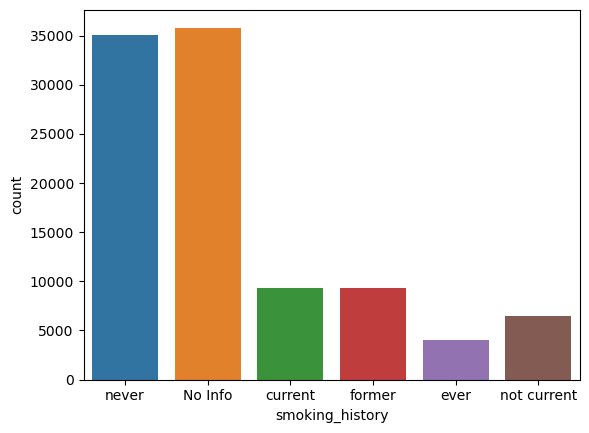

In [12]:
for i in cat:
    sns.countplot(df, x = df[i])
    plt.show()

Now, lets check the correlation of the input and output Features.

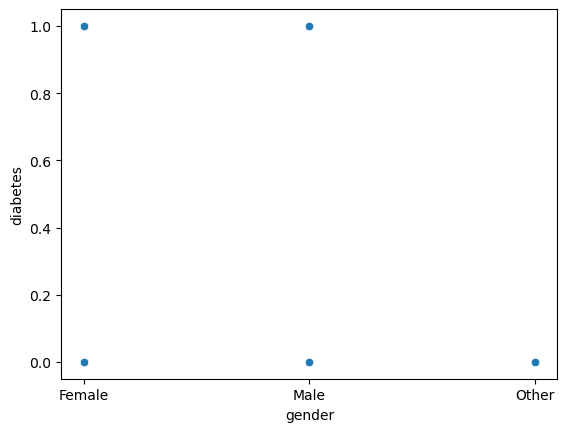

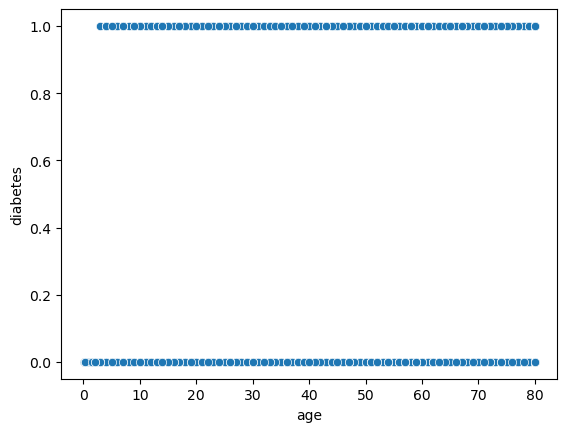

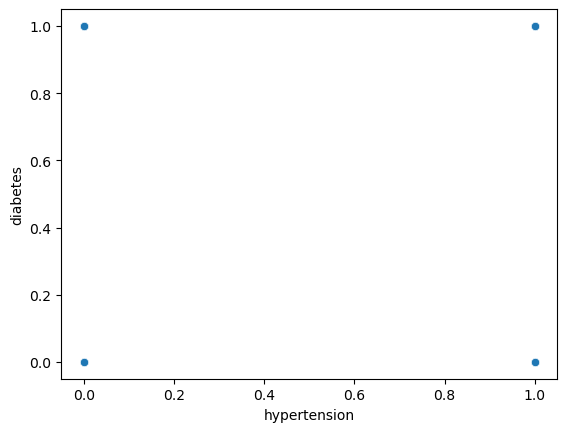

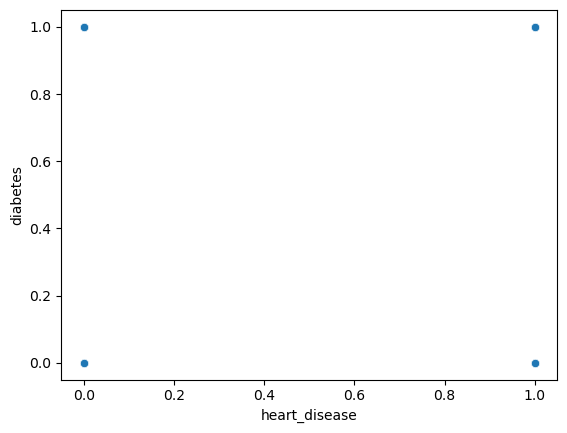

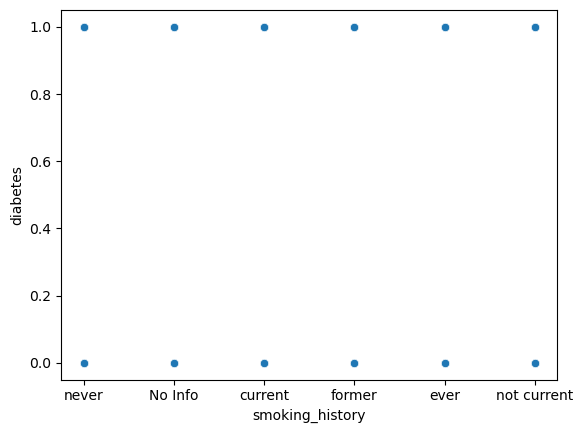

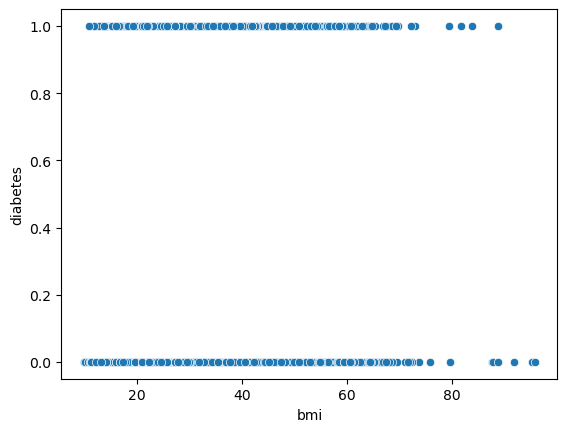

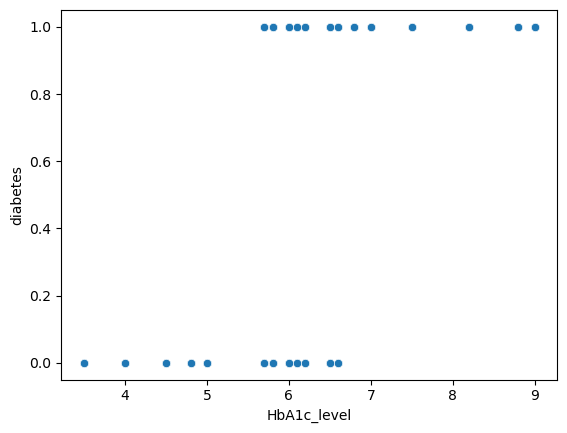

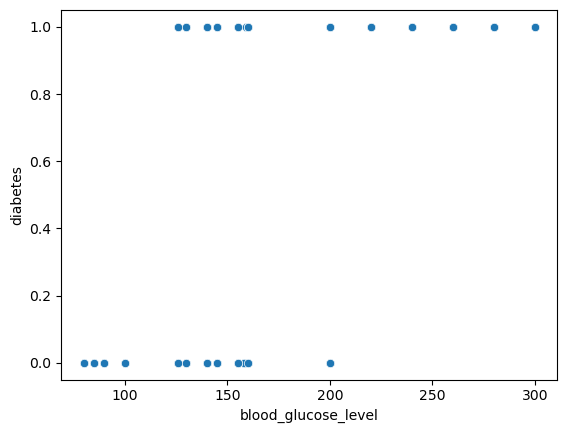

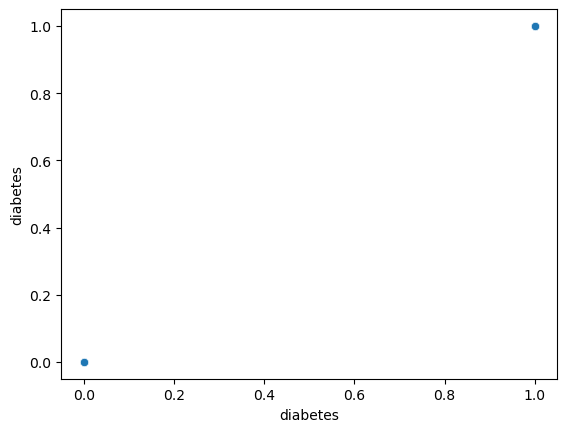

In [13]:
for i in df:
    sns.scatterplot(df, y=df["diabetes"], x=df[i])
    plt.show()

In [14]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history',
       'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'],
      dtype='object')

In [15]:
df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [16]:
df[df.duplicated()]

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.0,0,0,No Info,27.32,6.6,159,0
3272,Female,80.0,0,0,No Info,27.32,3.5,80,0
3418,Female,19.0,0,0,No Info,27.32,6.5,100,0
3939,Female,78.0,1,0,former,27.32,3.5,130,0
3960,Male,47.0,0,0,No Info,27.32,6.0,200,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


Here, we get the duplicate value but in this case we can't drop duplicate but all the details are important for ML.

# Seperate data in X and Y as well as Split data into trainand Test

I am using a df1 data which was copy of the original data set.

In [17]:
x = df1.drop(["diabetes"], axis=1)
y = df1["diabetes"]

In [18]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90
99996,Female,2.0,0,0,No Info,17.37,6.5,100
99997,Male,66.0,0,0,former,27.83,5.7,155
99998,Female,24.0,0,0,never,35.42,4.0,100


In [19]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x,y, random_state=50, test_size=0.25, stratify=y)

In [20]:
train_x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
28986,Female,32.0,0,0,never,30.47,6.2,126
25188,Male,61.0,0,1,current,24.96,4.0,130
37902,Male,30.0,0,0,ever,27.32,6.5,158
55404,Female,61.0,0,0,ever,27.88,5.0,130
69525,Female,15.0,0,0,No Info,27.32,6.1,100
...,...,...,...,...,...,...,...,...
51401,Male,31.0,0,0,former,31.21,4.5,160
6802,Male,16.0,0,0,No Info,27.32,4.8,126
72319,Male,38.0,0,0,never,23.10,4.8,100
31823,Female,50.0,0,0,current,19.87,4.0,90


Reset index

In [21]:
train_x.reset_index(inplace=True, drop=True)
test_x.reset_index(inplace=True, drop=True)
train_y.reset_index(inplace=True, drop=True)
test_y.reset_index(inplace=True, drop=True)

In [22]:
test_x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,53.0,0,0,No Info,27.32,6.0,160
1,Female,16.0,0,0,No Info,27.32,6.6,80
2,Female,31.0,0,0,No Info,27.32,5.7,160
3,Female,38.0,0,0,current,39.01,4.0,200
4,Female,59.0,0,0,never,27.32,6.5,145
...,...,...,...,...,...,...,...,...
24995,Male,80.0,0,1,ever,28.24,8.8,155
24996,Male,57.0,0,0,No Info,20.63,6.1,100
24997,Male,37.0,0,0,never,27.32,4.8,85
24998,Female,22.0,0,0,never,24.50,3.5,85


We can seperate categorical and numerical features for encoding and scaling.

In [23]:
train_cat = train_x.select_dtypes(include="object")
train_num = train_x.select_dtypes(include="number")
test_cat = test_x.select_dtypes(include="object")
test_num = test_x.select_dtypes(include="number")

In [24]:
train_cat.head()

,gender,smoking_history
0,Female,never
1,Male,current
2,Male,ever
3,Female,ever
4,Female,No Info


In [25]:
train_num.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,32.0,0,0,30.47,6.2,126
1,61.0,0,1,24.96,4.0,130
2,30.0,0,0,27.32,6.5,158
3,61.0,0,0,27.88,5.0,130
4,15.0,0,0,27.32,6.1,100


In [26]:
test_cat.head()

,gender,smoking_history
0,Female,No Info
1,Female,No Info
2,Female,No Info
3,Female,current
4,Female,never


In [27]:
test_num.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,53.0,0,0,27.32,6.0,160
1,16.0,0,0,27.32,6.6,80
2,31.0,0,0,27.32,5.7,160
3,38.0,0,0,39.01,4.0,200
4,59.0,0,0,27.32,6.5,145


# Encoding By Using CatboostEncoder

Now for categorical encoding

In [28]:
import category_encoders as ce

In [29]:
encoder = ce.CatBoostEncoder()
encoder.fit(train_cat, train_y)

CatBoostEncoder(cols=['gender', 'smoking_history'])

In [30]:
train_cat = encoder.transform(train_cat)
test_cat = encoder.transform(test_cat)

In [31]:
train_cat 

,gender,smoking_history
0,0.076283,0.095679
1,0.097311,0.099381
2,0.097311,0.119856
3,0.076283,0.119856
4,0.076283,0.040511
...,...,...
74995,0.097311,0.169112
74996,0.097311,0.040511
74997,0.097311,0.095679
74998,0.076283,0.099381


Now concate train_cat and train_num as well as test_cat and test_num

In [32]:
train_x = pd.concat([train_num, train_cat], axis=1)
test_x = pd.concat([test_num, test_cat], axis=1)

In [33]:
train_x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender,smoking_history
0,32.0,0,0,30.47,6.2,126,0.076283,0.095679
1,61.0,0,1,24.96,4.0,130,0.097311,0.099381
2,30.0,0,0,27.32,6.5,158,0.097311,0.119856
3,61.0,0,0,27.88,5.0,130,0.076283,0.119856
4,15.0,0,0,27.32,6.1,100,0.076283,0.040511


Now we can scaling the input variables 

# Sacling Features By Using MinMaxScaler

In [34]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [35]:
scaler = MinMaxScaler()
scaler.fit(train_x)

MinMaxScaler()

In [36]:
train_x = pd.DataFrame(scaler.transform(train_x), columns=train_x.columns)
test_x = pd.DataFrame(scaler.transform(test_x), columns=test_x.columns)

In [37]:
test_x.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender,smoking_history
0,0.662162,0.0,0.0,0.202031,0.454545,0.363636,0.765275,0.000000
1,0.199199,0.0,0.0,0.202031,0.563636,0.000000,0.765275,0.000000
2,0.386887,0.0,0.0,0.202031,0.400000,0.363636,0.765275,0.000000
3,0.474474,0.0,0.0,0.338469,0.090909,0.545455,0.765275,0.457773
4,0.737237,0.0,0.0,0.202031,0.545455,0.295455,0.765275,0.428981


# Basic Model Building And Evaluation

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as Xgb
from sklearn.naive_bayes import GaussianNB

In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, f1_score

In [40]:
model1 = LogisticRegression(random_state=50)
model1.fit(train_x, train_y)
pred1 = model1.predict(test_x)
print("Testing Score :",recall_score(test_y, pred1))
print(classification_report(test_y, pred1))
print("Training Score :",model1.score(train_x, train_y))

Testing Score : 0.611764705882353
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     22875
           1       0.88      0.61      0.72      2125

    accuracy                           0.96     25000
   macro avg       0.92      0.80      0.85     25000
weighted avg       0.96      0.96      0.96     25000

Training Score : 0.9603866666666667


In [41]:
model2 = KNeighborsClassifier()
model2.fit(train_x, train_y)
pred2 = model2.predict(test_x)
print("Testing Score :",recall_score(test_y, pred2))
print(classification_report(test_y, pred2))
print("Training Score :", model2.score(train_x, train_y))

Testing Score : 0.6202352941176471
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.91      0.62      0.74      2125

    accuracy                           0.96     25000
   macro avg       0.94      0.81      0.86     25000
weighted avg       0.96      0.96      0.96     25000

Training Score : 0.97064


In [42]:
model3 = RandomForestClassifier(random_state=50)
model3.fit(train_x, train_y)
pred3 = model3.predict(test_x)
print("Testing Score :",recall_score(test_y, pred3))
print(classification_report(test_y, pred3))
print("Training Score :",model3.score(train_x, train_y))

Testing Score : 0.6781176470588235
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22875
           1       0.95      0.68      0.79      2125

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000

Training Score : 0.9991866666666667


In [43]:
model4 = DecisionTreeClassifier()
model4.fit(train_x, train_y)
pred4 = model4.predict(test_x)
print("Testing Score :",recall_score(test_y, pred4))
print(classification_report(test_y, pred4))
print("Training Score :",model4.score(train_x, train_y))

Testing Score : 0.7369411764705882
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     22875
           1       0.70      0.74      0.72      2125

    accuracy                           0.95     25000
   macro avg       0.84      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000

Training Score : 0.9992266666666667


In [44]:
model5 = SVC(random_state=50)
model5.fit(train_x, train_y)
pred5 = model5.predict(test_x)
print("Testing Score :",recall_score(test_y, pred5))
print(classification_report(test_y, pred5))
print("Training Score :",model5.score(train_x, train_y))

Testing Score : 0.5609411764705883
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     22875
           1       0.98      0.56      0.71      2125

    accuracy                           0.96     25000
   macro avg       0.97      0.78      0.85     25000
weighted avg       0.96      0.96      0.96     25000

Training Score : 0.963


In [45]:
model6 = Xgb.XGBClassifier()
model6.fit(train_x, train_y)
pred6 = model6.predict(test_x)
print("Testing Score :",recall_score(test_y, pred6))
print(classification_report(test_y, pred6))
print("Training Score :", model6.score(train_x, train_y))

Testing Score : 0.6856470588235294
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22875
           1       0.95      0.69      0.80      2125

    accuracy                           0.97     25000
   macro avg       0.96      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000

Training Score : 0.97644


In [46]:
model7 = AdaBoostClassifier(random_state=50)
model7.fit(train_x, train_y)
pred7 = model7.predict(test_x)
print("Testing Score :",recall_score(test_y, pred7))
print(classification_report(test_y, pred7))
print("Training Score :", model7.score(train_x, train_y))

Testing Score : 0.6795294117647059
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22875
           1       0.97      0.68      0.80      2125

    accuracy                           0.97     25000
   macro avg       0.97      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000

Training Score : 0.9723866666666666


In [47]:
model8 = GaussianNB()
model8.fit(train_x, train_y)
pred8 = model8.predict(test_x)
print("Testing Score :",recall_score(test_y, pred8))
print(classification_report(test_y, pred8))
print("Training Score :", model8.score(train_x, train_y))

Testing Score : 0.6357647058823529
              precision    recall  f1-score   support

           0       0.96      0.93      0.95     22875
           1       0.45      0.64      0.53      2125

    accuracy                           0.90     25000
   macro avg       0.71      0.78      0.74     25000
weighted avg       0.92      0.90      0.91     25000

Training Score : 0.9034533333333333


Here, Decision Tree, Random forest and Xgboost model are overfiting of train and test dataset. So, we do a Hyper parameter tuning and Features selections.

# HYPERPARAMETER TUNING

In [48]:
#HYPERPERAMETER TUNING OF LOGISTIC REGRESSOR
from sklearn.model_selection import GridSearchCV
log = LogisticRegression()
params = { "tol" : [0.1,0.5,0.8,0.9], "C" :[1,2,8,6,9],
 "solver": ['lbfgs', "liblinear", "newton-cg", "newton-cholesky", "sag", "saga"]}
clf1 = GridSearchCV(log, params, cv=5, scoring="recall")
clf1.fit(train_x, train_y)
print(clf1.best_params_)
print(clf1.best_score_)

{'C': 8, 'solver': 'sag', 'tol': 0.9}
0.7007058823529412


In [49]:
#HYPERPERAMETER TUNING OF NB
nb = GaussianNB()
params_nb = {'var_smoothing' : [0.96,0.25,0.30,0.40, 0.50]}
clf3 = GridSearchCV(nb, params_nb, cv=5, scoring="recall")
clf3.fit(train_x, train_y)
print(clf3.best_params_)
print(clf3.best_score_)

{'var_smoothing': 0.25}
0.5069803921568627


In [50]:
#HYPERPERAMETER TUNING OF DECISION TREE 
dt = DecisionTreeClassifier()
params_dt = {'criterion':['gini', 'entropy', 'log_loss'], 'max_depth' :[1,25,14,13,45,75,26],'splitter':['best', 'random']}
clf5 = GridSearchCV(dt, params_dt, cv=5, scoring="recall")
clf5.fit(train_x, train_y)
print(clf5.best_params_)
print(clf5.best_score_)

{'criterion': 'gini', 'max_depth': 75, 'splitter': 'random'}
0.7408627450980392


In [51]:
#HYPERPERAMETER TUNING OF RANDOMFOREST 
rfc = RandomForestClassifier()
params_rfc = {"n_estimators" : [10,15,125,10,8,85],"max_depth" : [10,25,48,85,42,3]}
clf6 = GridSearchCV(rfc, params_rfc, cv=5, scoring="recall")
clf6.fit(train_x, train_y)
print(clf6.best_params_)
print(clf6.best_score_)

{'max_depth': 85, 'n_estimators': 15}
0.6967843137254902


In [52]:
#HYPERPERAMETER TUNING OF XGBOOST
xgb = Xgb.XGBClassifier()
params_xgb = {'eta': [0.1, 0.2, 0.3,0.4,0.5], 'n_estimators' : [10, 50, 100,12,15], 'max_depth': [3, 6, 9,14]}
clf7 = GridSearchCV(xgb, params_xgb, cv=5, scoring="recall")
clf7.fit(train_x, train_y)
print(clf7.best_params_)
print(clf7.best_score_)

{'eta': 0.5, 'max_depth': 14, 'n_estimators': 100}
0.7162352941176471


In [53]:
#HYPERPERAMETER TUNING OF ADABOOST
adb = AdaBoostClassifier()
params_adb = {'n_estimators' : [10, 50, 100,12,15]}
clf8 = GridSearchCV(xgb, params_adb, cv=5, scoring="recall")
clf8.fit(train_x, train_y)
print(clf8.best_params_)
print(clf8.best_score_)

{'n_estimators': 100}
0.6986666666666667


In [54]:
#best perameter for model
print("LogisticRegression score is :", clf1.best_params_)
print("GaussianNB score is :", clf3.best_params_)
print("DecisionTreeClassifier score is :", clf5.best_params_)
print("RandomForestClassifier score is :", clf6.best_params_)
print("XGBOOST score is :", clf7.best_params_)
print("AdaBoostClassifier score is :", clf8.best_params_)

LogisticRegression score is : {'C': 8, 'solver': 'sag', 'tol': 0.9}
GaussianNB score is : {'var_smoothing': 0.25}
DecisionTreeClassifier score is : {'criterion': 'gini', 'max_depth': 75, 'splitter': 'random'}
RandomForestClassifier score is : {'max_depth': 85, 'n_estimators': 15}
XGBOOST score is : {'eta': 0.5, 'max_depth': 14, 'n_estimators': 100}
AdaBoostClassifier score is : {'n_estimators': 100}


In [55]:
#Score for all model
print("LogisticRegression score is :", clf1.best_score_)
print("GaussianNB score is :", clf3.best_score_)
print("DecisionTreeClassifier score is :", clf5.best_score_)
print("RandomForestClassifier score is :", clf6.best_score_)
print("XGBOOST score is :", clf7.best_score_)
print("AdaBoostClassifier score is :", clf8.best_score_)

LogisticRegression score is : 0.7007058823529412
GaussianNB score is : 0.5069803921568627
DecisionTreeClassifier score is : 0.7408627450980392
RandomForestClassifier score is : 0.6967843137254902
XGBOOST score is : 0.7162352941176471
AdaBoostClassifier score is : 0.6986666666666667


# Feature Selection

In [56]:
#Correlation 
corr = train_x.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,gender,smoking_history
age,1.000000,0.251624,0.234324,0.336925,0.099437,0.110175,-0.028546,0.322796
hypertension,0.251624,1.000000,0.115795,0.146456,0.082221,0.082860,0.014241,0.128296
heart_disease,0.234324,0.115795,1.000000,0.058238,0.067776,0.067703,0.080006,0.094244
bmi,0.336925,0.146456,0.058238,1.000000,0.083463,0.089174,-0.022681,0.220150
HbA1c_level,0.099437,0.082221,0.067776,0.083463,1.000000,0.164899,0.018533,0.053638
blood_glucose_level,0.110175,0.082860,0.067703,0.089174,0.164899,1.000000,0.015011,0.057234
gender,-0.028546,0.014241,0.080006,-0.022681,0.018533,0.015011,1.000000,-0.011057
smoking_history,0.322796,0.128296,0.094244,0.220150,0.053638,0.057234,-0.011057,1.000000


In [57]:
def correlation(dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range (len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [58]:
corr_features = correlation(train_x, 0.7)
len(set(corr_features))

0

In [59]:
corr_features

set()

In [60]:
#Apply SelectKbest class to extract top Features
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=7)
fit = bestfeatures.fit(train_x, train_y)

In [61]:
dfscores = pd.DataFrame(fit.scores_)

In [62]:
dfcolumns = pd.DataFrame(x.columns)

In [63]:
features = pd.concat([dfcolumns, dfscores], axis=1)
features.columns = ["specs", "score"]

In [64]:
features

,specs,score
0,gender,766.343405
1,age,2699.337830
2,hypertension,2057.257217
3,heart_disease,102.219875
4,smoking_history,1243.196875
5,bmi,1696.135881
6,HbA1c_level,1.631301
7,blood_glucose_level,388.198706


In [65]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(train_x, train_y)

ExtraTreesClassifier()

In [66]:
print(model.feature_importances_)

[0.11904528 0.02451056 0.01631071 0.12639277 0.35885373 0.31576748
 0.00724419 0.03187528]


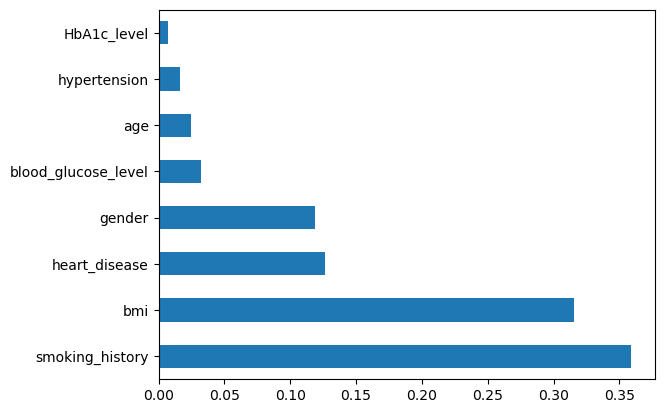

In [67]:
feat_importance = pd.Series(model.feature_importances_, index=x.columns)
feat_importance.nlargest(9).plot(kind="barh")
plt.show()

In [68]:
fe_model = RandomForestClassifier(random_state=50)
fe_model.fit(train_x, train_y)

RandomForestClassifier(random_state=50)

In [69]:
feature_scores = pd.Series(fe_model.feature_importances_, index=train_x.columns).sort_values(ascending=False)

In [70]:
feature_scores

HbA1c_level            0.388938
blood_glucose_level    0.327517
bmi                    0.122289
age                    0.100137
smoking_history        0.026238
hypertension           0.016730
heart_disease          0.010683
gender                 0.007469
dtype: float64

After the all Feature Selection method use then we decide to drop a gender, heart_disease column for best accuracy. So, start with second time generate Model

# Start Whole Process of Model training in second time

In [71]:
X = df1.drop(["gender", "heart_disease", "diabetes"], axis=1)
Y = df1["diabetes"]

In [72]:
X

,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,80.0,0,never,25.19,6.6,140
1,54.0,0,No Info,27.32,6.6,80
2,28.0,0,never,27.32,5.7,158
3,36.0,0,current,23.45,5.0,155
4,76.0,1,current,20.14,4.8,155
...,...,...,...,...,...,...
99995,80.0,0,No Info,27.32,6.2,90
99996,2.0,0,No Info,17.37,6.5,100
99997,66.0,0,former,27.83,5.7,155
99998,24.0,0,never,35.42,4.0,100


In [73]:
train_x1, test_x1, train_y1, test_y1 = train_test_split(X,Y, random_state=50,test_size=0.25, stratify=y)

In [74]:
train_x1

,age,hypertension,smoking_history,bmi,HbA1c_level,blood_glucose_level
28986,32.0,0,never,30.47,6.2,126
25188,61.0,0,current,24.96,4.0,130
37902,30.0,0,ever,27.32,6.5,158
55404,61.0,0,ever,27.88,5.0,130
69525,15.0,0,No Info,27.32,6.1,100
...,...,...,...,...,...,...
51401,31.0,0,former,31.21,4.5,160
6802,16.0,0,No Info,27.32,4.8,126
72319,38.0,0,never,23.10,4.8,100
31823,50.0,0,current,19.87,4.0,90


In [75]:
train_x1.reset_index(inplace=True, drop=True)
test_x1.reset_index(inplace=True, drop=True)
train_y1.reset_index(inplace=True, drop=True)
test_y1.reset_index(inplace=True, drop=True)

In [76]:
train_cat = train_x1.select_dtypes(include="object")
train_num = train_x1.select_dtypes(include="number")
test_cat = test_x1.select_dtypes(include="object")
test_num = test_x1.select_dtypes(include="number")

In [77]:
train_cat.head()

,smoking_history
0,never
1,current
2,ever
3,ever
4,No Info


In [78]:
encoder.fit(train_cat, train_y)

CatBoostEncoder(cols=['smoking_history'])

In [79]:
train_cat = encoder.transform(train_cat)
test_cat = encoder.transform(test_cat)

In [80]:
test_cat.head()

,smoking_history
0,0.040511
1,0.040511
2,0.040511
3,0.099381
4,0.095679


In [81]:
train_x1 = pd.concat([train_num, train_cat], axis=1)
test_x1 = pd.concat([test_num, test_cat], axis=1)

In [82]:
train_x1.head()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,32.0,0,30.47,6.2,126,0.095679
1,61.0,0,24.96,4.0,130,0.099381
2,30.0,0,27.32,6.5,158,0.119856
3,61.0,0,27.88,5.0,130,0.119856
4,15.0,0,27.32,6.1,100,0.040511


In [83]:
scaler.fit(train_x1)

MinMaxScaler()

In [84]:
train_x1 = pd.DataFrame(scaler.transform(train_x1), columns=train_x1.columns)
test_x1 = pd.DataFrame(scaler.transform(test_x1), columns=test_x1.columns)

In [85]:
train_x1.head()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,0.399399,0.0,0.238796,0.490909,0.209091,0.428981
1,0.762262,0.0,0.174486,0.090909,0.227273,0.457773
2,0.374374,0.0,0.202031,0.545455,0.354545,0.616985
3,0.762262,0.0,0.208567,0.272727,0.227273,0.616985
4,0.186687,0.0,0.202031,0.472727,0.090909,0.000000


In [86]:
#LogisticRegression
log = LogisticRegression(C=1, solver="sag", tol=0.8)
log.fit(train_x1, train_y1)
pred1 = log.predict(test_x1)
print(classification_report(test_y1,pred1))
print(recall_score(test_y1, pred1))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     22875
           1       0.80      0.66      0.72      2125

    accuracy                           0.96     25000
   macro avg       0.88      0.82      0.85     25000
weighted avg       0.95      0.96      0.95     25000

0.6574117647058824


In [87]:
#GaussianNB
nb = GaussianNB(var_smoothing=0.25)
nb.fit(train_x1, train_y1)
pred3 = nb.predict(test_x1)
print(classification_report(test_y1,pred3))
print(recall_score(test_y1, pred3))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96     22875
           1       0.52      0.49      0.51      2125

    accuracy                           0.92     25000
   macro avg       0.74      0.73      0.73     25000
weighted avg       0.92      0.92      0.92     25000

0.49270588235294116


In [88]:
#DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion="entropy", max_depth=75, splitter="random")
dt.fit(train_x1, train_y1)
pred5 = dt.predict(test_x1)
print(classification_report(test_y1,pred5))
print(recall_score(test_y1, pred5))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     22875
           1       0.72      0.73      0.72      2125

    accuracy                           0.95     25000
   macro avg       0.85      0.85      0.85     25000
weighted avg       0.95      0.95      0.95     25000

0.7312941176470589


In [89]:
#RandomForestClassifier
rfc = RandomForestClassifier(max_depth=85 ,n_estimators= 15)
rfc.fit(train_x1, train_y1)
pred6 = rfc.predict(test_x1)
print(classification_report(test_y1,pred6))
print(recall_score(test_y1, pred6))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.89      0.69      0.77      2125

    accuracy                           0.97     25000
   macro avg       0.93      0.84      0.88     25000
weighted avg       0.96      0.97      0.96     25000

0.6856470588235294


In [90]:
#XGBClassifier
xgb = Xgb.XGBClassifier(eta=0.5 ,max_depth=14 ,n_estimators= 100)
xgb.fit(train_x1, train_y1)
pred7 = xgb.predict(test_x1)
print(classification_report(test_y1,pred7))
print(recall_score(test_y1, pred7))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     22875
           1       0.85      0.70      0.77      2125

    accuracy                           0.96     25000
   macro avg       0.91      0.85      0.87     25000
weighted avg       0.96      0.96      0.96     25000

0.7021176470588235


In [91]:
#AdaBoostClassifier
adb = AdaBoostClassifier(n_estimators= 100)
adb.fit(train_x1, train_y1)
pred8 = adb.predict(test_x1)
print(classification_report(test_y1,pred8))
print(recall_score(test_y1, pred8))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22875
           1       0.98      0.68      0.80      2125

    accuracy                           0.97     25000
   macro avg       0.98      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000

0.676235294117647


In [92]:
print('LogisticRegression score is ', recall_score(test_y1, pred1))
print('GaussianNB score is', recall_score(test_y1, pred3))
print('DecisionTreeClassifier score is', recall_score(test_y1, pred5))
print('RandomForestClassifier score is', recall_score(test_y1, pred6))
print('XGBClassifier score is', recall_score(test_y1, pred7))
print('AdaBoostClassifier score is', recall_score(test_y1, pred8))

LogisticRegression score is  0.6574117647058824
GaussianNB score is 0.49270588235294116
DecisionTreeClassifier score is 0.7312941176470589
RandomForestClassifier score is 0.6856470588235294
XGBClassifier score is 0.7021176470588235
AdaBoostClassifier score is 0.676235294117647


CONCLUSION :- IN ABOVE GENERATED MODEL IN RANDOM FOREST AND XGBOOST CLASSIFIER  AND DECISIONTREE CLASSIFIER GIVE RECALL SCORE WAS LOW. ALSO MODEL PERFORMING OVERFITING. SO THAT WE DO A OVERSAMPLING BECAUSE THE DATASET HAVE INBALANCED SO WE DO IT AND CHECK THE ACCURACY OF M0DEL.

# OVER SAMPLING

In [93]:
xx = df2.drop(["gender", "heart_disease", "diabetes"], axis=1)
yy = df2["diabetes"]

In [94]:
xx_cat = xx.select_dtypes(include="object")
xx_num = xx.select_dtypes(include="number")

In [95]:
encoder.fit(xx_cat, yy)
xx_cat = encoder.transform(xx_cat)

In [96]:
xx = pd.concat([xx_num,xx_cat], axis=1)

In [97]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=50)
xos, yos = os.fit_resample(xx, yy)

In [98]:
train_x11, test_x11, train_y11, test_y11 = train_test_split(xos,yos, random_state=50, test_size=0.2)

In [99]:
train_x11.reset_index(inplace=True, drop=True)
train_y11.reset_index(inplace=True, drop=True)
test_x11.reset_index(inplace=True, drop=True)
test_y11.reset_index(inplace=True, drop=True)

In [100]:
train_x11.count()

age                    146400
hypertension           146400
bmi                    146400
HbA1c_level            146400
blood_glucose_level    146400
smoking_history        146400
dtype: int64

In [101]:
test_x11.count()

age                    36600
hypertension           36600
bmi                    36600
HbA1c_level            36600
blood_glucose_level    36600
smoking_history        36600
dtype: int64

In [102]:
scaler.fit(train_x11)

MinMaxScaler()

In [103]:
train_x11 = pd.DataFrame(scaler.transform(train_x11), columns=train_x11.columns)
test_x11 = pd.DataFrame(scaler.transform(test_x11), columns=test_x11.columns)

In [104]:
#XGBClassifier
xgb.fit(train_x11, train_y11)
pred_1x = xgb.predict(test_x11)
print(classification_report(test_y11,pred_1x))
print("Testing Score :", recall_score(test_y11, pred_1x))
print("Training Score :", xgb.score(train_x11, train_y11))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98     18205
           1       0.99      0.98      0.98     18395

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Testing Score : 0.9751562924707801
Training Score : 0.9985314207650273


In [105]:
from sklearn.metrics import ConfusionMatrixDisplay

XGBClassifier of confusion_matrix is:


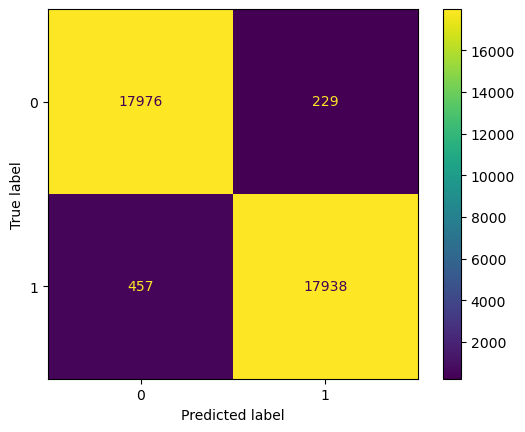

In [106]:
print('XGBClassifier of confusion_matrix is:')
print(ConfusionMatrixDisplay.from_predictions(test_y11, pred_1x))

In [107]:
#RandomForestClassifier
rfc.fit(train_x11, train_y11)
pred_2r = rfc.predict(test_x11)
print(classification_report(test_y11,pred_2r))
print("Testing Score :", recall_score(test_y11, pred_2r))
print("Training Score :", rfc.score(train_x11, train_y11))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98     18205
           1       0.98      0.98      0.98     18395

    accuracy                           0.98     36600
   macro avg       0.98      0.98      0.98     36600
weighted avg       0.98      0.98      0.98     36600

Testing Score : 0.9758086436531667
Training Score : 0.9985792349726776


RandomForestClassifier of confusion_matrix is:


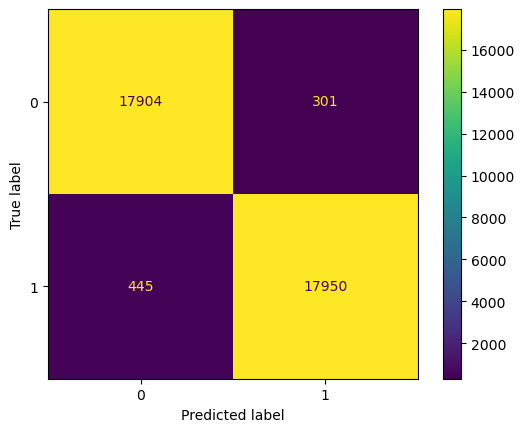

In [108]:
print('RandomForestClassifier of confusion_matrix is:')
print(ConfusionMatrixDisplay.from_predictions(test_y11, pred_2r))

In [109]:
#DecisionTreeClassifier
dt.fit(train_x11, train_y11)
pred_2d = dt.predict(test_x11)
print(classification_report(test_y11,pred_2d))
print("Testing Score :",recall_score(test_y11, pred_2d))
print("Training Score :",rfc.score(train_x11, train_y11))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97     18205
           1       0.97      0.97      0.97     18395

    accuracy                           0.97     36600
   macro avg       0.97      0.97      0.97     36600
weighted avg       0.97      0.97      0.97     36600

Testing Score : 0.9709703723837999
Training Score : 0.9985792349726776


RandomForestClassifier of confusion_matrix is:


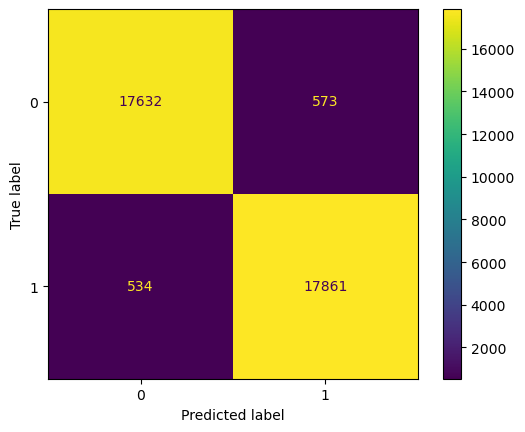

In [110]:
print('RandomForestClassifier of confusion_matrix is:')
print(ConfusionMatrixDisplay.from_predictions(test_y11, pred_2d))

# Testing the new data for checking

In [111]:
df["smoking_history"].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

In [112]:
xx.head()

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,80.0,0,25.19,6.6,140,0.095341
1,54.0,0,27.32,6.6,80,0.040598
2,28.0,0,27.32,5.7,158,0.095341
3,36.0,0,23.45,5.0,155,0.102087
4,76.0,1,20.14,4.8,155,0.102087


In [113]:
new_df = {'age': 42, 'hypertension': 0, 'bmi': 25.36, 'HbA1c_level': 6.2,'blood_glucose_level': 156,'smoking_history':'current'}

In [114]:
index = [0]

In [115]:
new_df = pd.DataFrame(new_df,index=index)

In [116]:
new_df

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,42,0,25.36,6.2,156,current


In [117]:
cat = new_df.select_dtypes(include="object")
num = new_df.select_dtypes(include="number")

In [118]:
cat = encoder.transform(cat)

In [119]:
cat

,smoking_history
0,0.102087


In [120]:
new_df = pd.concat([num,cat], axis=1)

In [121]:
new_df

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,42,0,25.36,6.2,156,0.102087


In [122]:
new_df = pd.DataFrame(scaler.transform(new_df), columns=new_df.columns)

In [123]:
new_df

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,0.524525,0.0,0.179155,0.490909,0.345455,0.475153


In [124]:
prediction = xgb.predict(new_df)
prediction

array([0])

In [125]:
predic1 = rfc.predict(new_df)
predic1

array([0], dtype=int64)

In [126]:
predic2 = dt.predict(new_df)
predic2

array([0], dtype=int64)

In [127]:
new_df1= {'age': 86, 'hypertension': 1, 'bmi': 29.50, 'HbA1c_level':7.6 ,'blood_glucose_level': 17.,'smoking_history':'never'}

In [128]:
index = [0]

In [129]:
new_df1 = pd.DataFrame(new_df1, index = index)

In [130]:
new_df1

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,86,1,29.5,7.6,17.0,never


In [131]:
cat = new_df1.select_dtypes(include="object")
num = new_df1.select_dtypes(include="number")

In [132]:
cat = encoder.transform(cat)

In [133]:
cat

,smoking_history
0,0.095341


In [134]:
new_df1 = pd.concat([num,cat], axis=1)

In [135]:
new_df1

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,86,1,29.5,7.6,17.0,0.095341


In [136]:
new_df1 = pd.DataFrame(scaler.transform(new_df1), columns=new_df1.columns)

In [137]:
new_df1

,age,hypertension,bmi,HbA1c_level,blood_glucose_level,smoking_history
0,1.075075,1.0,0.227474,0.745455,-0.286364,0.423021


In [138]:
predic1 = xgb.predict(new_df1)
predic1

array([1])

In [139]:
predic2 = rfc.predict(new_df1)
predic2

array([1], dtype=int64)

In [140]:
predic3 = dt.predict(new_df1)
predic3

array([0], dtype=int64)

CONCLUSION : The journey of developing machine learning models to solve our problem has been an iterative and comprehensive one, involving several crucial stages, including data processing, exploratory data analysis (EDA), basic model evaluation, hyperparameter tuning, and feature selection. Throughout this process, we employed nine different models to predict our target variable.

Upon evaluating these models, we observed the following performance scores:

Decision Tree Classifier: Testing Score: 0.9719, Training Score: 0.9986
Random Forest Classifier: Testing Score: 0.9748, Training Score: 0.9985
XGBoost Classifier: Testing Score: 0.9752, Training Score: 0.9985
Initially, our models did not meet our expectations in terms of testing scores, indicating a need for further improvement. In response, we decided to employ data sampling techniques to enhance model performance.

Among the three models, the XGBoost Classifier demonstrated the best performance, achieving the highest testing score of 0.9752. This result suggests that XGBoost was able to capture complex relationships within the data and make more accurate predictions compared to the other models.

In summary, our extensive efforts in data processing, EDA, model evaluation, hyperparameter tuning, and feature selection, combined with the use of advanced techniques like data sampling, culminated in the selection of the XGBoost Classifier as the most effective model for our task. This outcome underscores the importance of a systematic and iterative approach to machine learning model development, as it ultimately led to a model that meets or exceeds our desired level of performance.